<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 16**

## **Contenido**

- <a href="#ses"> Validación de los modelos</a><br>
- <a href="#ses"> Sesgo/varianza de los modelos</a><br>
- <a href="#ses"> Curvas de validación</a><br>
- <a href="#ses"> Curvas de aprendizaje</a><br>
- <a href="#ses"> GridSearch</a><br>




# **Validación de los modelos**




¿Si nuestro estimador tiene bajo rendimiento, qué deberíamos hacer? 

* Usar un modelo más complejo/flexible
* Usar un modelo menos complejo/flexible
* Conseguir más datos de entrenamiento

La respuesta a esta pregunta a menudo es contraintuitiva. En particular, a veces el uso de un modelo más complicado dará peores resultados, y agregar más muestras de entrenamiento puede que no mejore nuestros resultados.

Volvamos al caso de la sesión anterior

# **Sesgo/varianza de los modelos**

Está claro que ninguno de estos modelos se ajusta particularmente bien a los datos, pero fallan de diferentes maneras.

El primer modelo intenta encontrar ajusta una línea recta a los datos. Debido a que los datos son intrínsecamente más complicados que una línea recta, el modelo de línea recta nunca podrá describir bien este conjunto de datos. Se dice que tal modelo se "subajusta" a los datos; es decir, no tiene suficiente flexibilidad para tener en cuenta adecuadamente todas las características de los datos. Otra forma de decir esto es que el modelo tiene un ***alto sesgo***.

El segundo modelo intenta ajustar un polinomio de orden superior a los datos. Aquí, el ajuste del modelo tiene suficiente flexibilidad para tener en cuenta casi perfectamente las características finas de los datos, pero aunque describe con mucha precisión los datos de entrenamiento, su forma precisa parece reflejar más las propiedades de ruido particulares de los datos que las propiedades intrínsecas de cualquiera sea el proceso con el que se generaron los datos. Se dice que tal modelo "sobreajusta" los datos; es decir, tiene tanta flexibilidad que el modelo termina teniendo en cuenta los errores aleatorios, así como la distribución de datos subyacente. Otra forma de decir esto es que el modelo tiene una ***alta varianza***.

Podemos caracterizar estos modelos teniendo en cuenta además qué tan bien se generalizan a los datos de validación.

* Para modelos con un sesgo alto, el rendimiento del modelo en el conjunto de validación es similar al rendimiento en el conjunto de entrenamiento.

* Para modelos con una alta varianza, el rendimiento del modelo sobre el conjunto de validación es mucho peor que el rendimiento sobre los datos de entrenamiento






# **Curvas de validación**

Básicamente, la cuestión del "mejor modelo" se trata de encontrar un punto óptimo de equilibrio entre el sesgo y la varianza. Podemos visualizar esto con lo que se conoce como la *curva de validación*. Si imaginamos que tenemos cierta capacidad para ajustar la complejidad del modelo, esperamos que los puntajes de entrenamiento y validación se comporten de la siguiente manera:

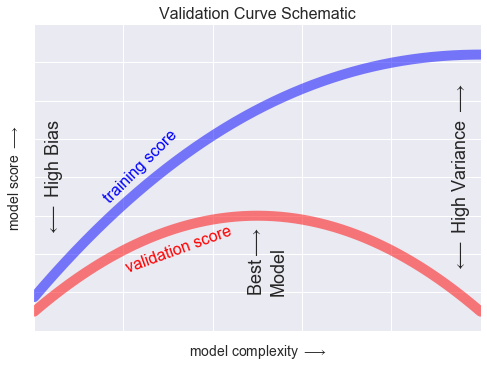

* El puntaje de entrenamiento generalmente es mayor que el de validación: el modelo ajustará mejor a los datos que ha "visto" que a datos que no haya "visto".

* Para un modelo de muy baja complejidad (modelo con alto sesgo), sub-ajustará los datos de entrenamiento, lo que significa que el modelo es un predictor muy pobre tanto para los datos de entrenamiento como de validación.

* Para un modelo de alta complejidad (modelo con alta varianza), el modelo sobreajustará los datos de entrenamiento, lo que significa que el modelo predecirá muy bien los datos de entrenamiento, pero fallará en las predicciones para los datos de validación.

* Para algún valor intermedio, la curva de validación tiene un máximo. Este nivel de complejidad indica un punto óptimo entre la varianza y el sesgo.

Los medios mediante los cuales podemos ajustar la complejidad del modelo varían de un modelo a otro; cuando analicemos modelos individuales en profundidad en secciones posteriores, veremos cómo cada modelo permite tal ajuste.

Podemos obtener estas curvuas utilizando la clase `validation_curve` de Sklearn.


Esto muestra precisamente el comportamiento cualitativo que esperamos: el puntaje de entrenamiento es en todas partes más alto que el puntaje de validación; la puntuación de entrenamiento mejora monótonamente con una mayor complejidad del modelo; y la puntuación de validación alcanza un máximo antes de caer cuando el modelo se sobreajusta.

De la curva de validación, podemos leer que la compensación óptima entre sesgo y varianza se encuentra para un polinomio de tercer orden.


Note que para encontrar este modelo óptimo no es necesario que calculemos el puntaje de entrenamiento. Examinar la relación entre los puntajes de entrenamiento y de validación puede brindarnos información útil sobre el rendimiento del modelo.


# **Curvas de aprendizaje**

Un aspecto importante de la complejidad del modelo es que el modelo óptimo generalmente dependerá del tamaño de los datos de entrenamiento.


De la curva de validación se desprende claramente que el conjunto de datos más grande puede admitir un modelo mucho más complejo: el pico aquí probablemente sea de alrededor de un grado 7, pero incluso un modelo de grado 12 no sobreajusta seriamente los datos; las puntuaciones de validación y entrenamiento permanecen muy cerca.

Vemos entonces que el comportamiento de la curva de validación no tiene una sino dos entradas importantes: la complejidad del modelo y el número de puntos de entrenamiento. 

A menudo es útil explorar el comportamiento del modelo en función del número de puntos de entrenamiento, lo que podemos hacer usando subconjuntos de datos cada vez más grandes para ajustar nuestro modelo. Una gráfica de los puntajes de entrenamiento/validación con respecto al tamaño del conjunto de entrenamiento se conoce como *curva de aprendizaje*.



![picture](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAecAAAFwCAYAAACCbrOvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd8FHX+x/HXzLb0BmkkkACGIr0JSA5OVAR7Fz2lqCB4%0AgsJ5/k49OO4U0QPlRATOLmCLp4K9gNIUsNFUeickgZDed3fm98dkNwlJIMgmuxs+z8cjj92dncx8%0Ad1jynu93vvP9Krqu6wghhBDCZ6jeLoAQQgghapJwFkIIIXyMhLMQQgjhYySchRBCCB8j4SyEEEL4%0AGAlnIYQQwsdIOAufMnToUB5//HFvF6Ne6enpdOrUiS+//LJJ9udwOFi8eDE33ngjffr0YeDAgYwe%0APZrVq1c3yf7Pxvr167nrrru44IIL6N69OyNGjGDu3LkUFxc3eBvvv/8+nTp1Ii8vrxFL+vtVVFQw%0Ac+ZMVq5c6V7m699h4R/M3i6AEP4kOjqatLQ0kpOTG31fRUVF3HXXXezbt4/Ro0czZcoUHA4Hn3zy%0ACffccw8PP/wwo0ePbvRy/B6rV69m4sSJ3HjjjYwaNYqAgAC2b9/OokWL2LhxI2+99RaKopx2O4qi%0ANGg9bzl+/DhLliyhX79+7mULFiwgLCzMi6USzYGEsxBnwGq10r179ybZ18yZM9m1axdvv/02HTt2%0AdC8fMmQIQUFBzJ49m0suuYSEhIQmKc+ZePnll0lNTeVf//qXe1n//v1p27YtEyZMYO3atQwePNiL%0AJfSMusZw6tSpkxdKIpobadYWfqe0tJTHHnuMQYMG0aNHD+644w62b99eY52tW7cyfvx4+vXrR9eu%0AXRk+fDjvvPOO+/0PPviAAQMG8PLLL9O/f38uuugiSktL6dSpEx988AFTp06ld+/eDBgwgCeeeAJN%0A04DazdoPP/wwkydPZvHixQwdOpQePXowatQo9u7dW6M8b7zxBsOGDaNHjx7ceeedLFu2jE6dOnH0%0A6NE6P2NOTg4ffvghN998c41gdrn33nu57bbbKCsrA+Bvf/sbV111VY11VqxYUWMfd9xxB9OnT+eu%0Au+6iR48eTJs2jV69evHCCy/U+L3du3fTqVMnNmzY4C7LQw89RP/+/enVqxcTJ07kyJEjp/w3ysnJ%0AcR+z6gYNGsSUKVOIi4tzLzt69Cj3338//fv3p3///kyePJmMjIwav7d+/XquvfZaunfvzpVXXsnX%0AX39d4/1Dhw5x77330rt3b/r168dDDz1Ebm6u+33Xv9Mrr7zCkCFD6NWrF/fffz9FRUXMnz+fQYMG%0AMWDAgFrN0af6HqWnp3PJJZegKAqTJ09m1KhRQO1m7YZ8PiFOJuEs/M6ECRP47LPPmDJlCvPmzcNm%0As3HHHXdw+PBhADIyMhg9ejQhISHMmzePhQsX0rZtW2bMmMHu3bvd2yksLOTjjz/mmWee4eGHHyYw%0AMBCAWbNmERUVxYIFC7j99ttZvHgxaWlp9ZZn/fr1LFu2jL///e/MmTOHgwcP8sgjj7jff+edd3j8%0A8ccZNmwYCxYsoHXr1kyfPv2UzbXr169H07R6a5cxMTE88sgjtG/fHqDebZ28/P3336d9+/YsXLiQ%0AW265haFDh/L555/XWOfTTz8lJiaGAQMGUF5ezh133MGmTZuYPn06s2fPJjs7m9tvv53CwsJ6y/+H%0AP/yBdevWMWHCBD799FOys7MBMJvNjB8/ng4dOgBG0/2tt97K7t27mTFjBk899RT79u1j/Pjx7lqp%0AruvMnDmT0aNHs3DhQkJDQ5k6dSo5OTkAnDhxgltvvZXMzExmz57NP//5TzZv3sxdd92Fw+Fwl+nb%0Ab7/lq6++4vHHH+ehhx7iq6++4oYbbmDbtm38+9//5pZbbmHp0qV8+umnwOm/RzExMcyfPx9d1/nL%0AX/7CP/7xj1rHob7PN27cuDpr3UK4SLO28Ctr165l48aNvPbaawwYMAAwguDyyy9n0aJFzJw5k927%0Ad9O7d2/mzJmDqhrnnz169OCCCy7g+++/JyUlBQBN07jvvvsYNGhQjX307t2bv//97wAMGDCAr7/+%0AmtWrVzNy5Mg6y1RSUsKLL75IixYtAMjMzOSJJ54gPz+f8PBwFixYwHXXXceDDz4IGLXHrKysU3bq%0AyszMBKBVq1a/91DVKTg4uMaJw1VXXcXEiRM5fPgwrVu3BuCLL77g8ssvB4wWhoMHD/Lxxx+7r7MP%0AHDiQiy66iCVLlnDvvffWuZ8pU6ZQUFDAsmXLWLVqFQDt2rXjsssuY+zYse5rsu+99x4nTpzgrbfe%0Acn/WuLg47rvvPvbt2wcYJxiPPvooI0aMACAyMpLrr7+eLVu2cNFFF/Haa69ht9t59dVXCQ8PB4x/%0A72HDhvHJJ59wzTXXAEaLy/z5893/TsuXL2fv3r0sW7aMwMBABg0axPLly9myZQuXX355g75HnTt3%0ABiApKcl9olTd6T5fXb8jBEjNWfiZ77//nsDAQPr27YvT6cTpdKJpGqmpqaxfvx6AwYMH8/LLL+Nw%0AONixYwdffPEFixYtQlEU7HZ7je3V1bHr5GvKsbGxlJaW1lumVq1auf/gA+4m29LSUg4ePEhWVhYX%0AX3xxjd8ZPnz4KT+nyWQCqLNp+GwkJSXVeJ2amkp4eLi79rxjxw727dvHFVdcARjHOykpidatW7uP%0At81mo0+fPu7jXRer1crMmTP5+uuvmTFjBsOGDePEiRMsWrSIK6+8kvT0dAA2b95MSkpKjZOQTp06%0AsWLFihrB1atXL/dz1zX2goICdxl79uxJSEiIu4yxsbG0b9/e3TQPxr9L9X+nFi1a0LZtW3eLCUBE%0ARIR7u2fyPapPQz+fECeTmrPwK3l5eZSWltK1a9cayxVFwWKxAEagzZo1i7S0NBwOB61bt6Zfv37o%0Aul6rKbH6H2uX6n+sAVRVPWVIBgQE1CqLqxyu655RUVE11mnZsuWpPqb7j3lGRka9f8SzsrKIjY09%0A5XZOdnI5zGYzl112GZ9//jnjxo3js88+IykpiW7dugHG8d67dy9dunSp8XuKojSox3psbCwjR45k%0A5MiRaJrG8uXLmT59OvPnz2fWrFnk5+fXKlNdqh9jVy3W9W+Zl5fH1q1b6yxjTEyM+3VwcPApt3uy%0A+r5H1fd9Og39fEKcTMJZ+JWQkBBatmzJCy+8UO8fyAULFvC///2P2bNnM3jwYAICAigrK+Pdd99t%0A4tLiDk/X9VGXk1+frH///phMJtauXUtqamqt97Ozsxk6dCj33XcfEydOBGoHRklJSYPKeOWVV5KW%0AlkZ6enqNJm0wjnfnzp2ZOXNmre1brdY6t7dlyxbuvfdeFi5cWKMVQlVVrrvuOlauXOnuMBcSElJn%0A57I1a9bUCtv6hISEMHjwYO6///5aZawrkBvKE9+j032+uk4OhQBp1hZ+pk+fPuTk5BAYGEiXLl3c%0AP8uXL+fDDz8EjHDo2rUrw4YNc9eM1qxZAzS8xuMpcXFxJCQk1OpdvGLFilP+Xnh4OFdffTVpaWk1%0AOrG5zJ07FzCCFYwQcHW6cvnxxx8bVMZ+/foRFxfHSy+9xMGDB93bBON4HzlyhFatWtU43q+88grf%0AfPNNndtLTk6muLiYJUuW1HrP6XRy+PBhd4ew3r17s2vXrhq9l/fu3cv48ePZuXNng8rfp08f9u3b%0AR0pKirt8KSkpPPfcc/z0008N2kZdGvI9cl1+qI8nPp84N0nNWfic7du38/rrr9dafuWVVzJ06FC6%0Adu3KuHHjuO+++4iPj+fzzz/n7bffdt9T261bN1588UXeeOMNOnTowNatW1mwYAGqqp7y2rEnuf54%0AK4rCvffey/Tp04mKimLgwIGsWrXKPaKUq4m2Lg8++CDbtm3j9ttv54477qBPnz4UFhby/vvvs3r1%0AaqZPn+7uxDV48GCWLl3KjBkzuPzyy9mwYUONUatOZ8SIEbz++ut07NixRjP6DTfcwJIlSxg7dizj%0Ax48nIiKCt99+mxUrVrg7Wp0sPDycKVOm8OSTT5KTk8P1119PbGwsx44d45133iErK4v58+e7t//a%0Aa68xfvx4Jk2ahKqqPPvss/Ts2ZMBAwawfPny05Z97NixLF++nLvvvptRo0ZhNpt55ZVX2Lp1Kw88%0A8ECDj8HJGvI9CgkJAeC7776jTZs2te5xPt3nE6I+Es7C5/z888/8/PPPtZb36tWLFi1a8MorrzB7%0A9mzmzJlDUVERSUlJzJo1i2uvvRaA8ePHk52dzfPPP095eTlJSUlMnz6djz76iM2bN59y3/WNSFV9%0A2cnrnG79G264gaKiIl5//XUWL15M3759mThxIs8//zxBQUH1liUqKoo333yTV199lS+++IJXX30V%0Am81Gp06deOWVVxg4cKB73T/84Q9MmTKFpUuXsnz5cgYMGMBTTz3FuHHj6i1XdVdddRWvvvpqjVoz%0AGOHzxhtv8O9//5sZM2ZQUVFBhw4dWLBgwSkHERk9ejTJycksXbqUmTNnUlBQQGRkJKmpqTzxxBPu%0ATl2hoaG88cYbPPnkkzz88MNYrVaGDBnCQw89dMoTl+qfIz4+njfffJPZs2fz0EMPoSgKXbp04bXX%0AXqsRlqf7d3K9di1ryPcoJCSE8ePHs2TJEjZt2sTy5ctrbPP3fj4hFF1uthOiUX388cf07NmTxMRE%0A97JnnnmGtLS0Gr2JhRDCRWrOQjSy9957j//+979MmjSJyMhItmzZwuLFi7n77ru9XTQhhI+SmrMQ%0AjezEiRPMnj2bdevWUVhYSEJCAjfffDNjxozxdtGEED5KwlkIIYTwMdIjQQghhPAxPhPOUoEXQggh%0ADD7TIUxRFI4fr3+WG3H2oqND5Rg3ATnOjU+OceOTY9w0oqND61zuMzVnIYQQQhgknIUQQggfI+Es%0AhBBC+BgJZyGEEMLHSDgLIYQQPkbCWQghhPAxEs5CCCGEj5FwFkIIIXyMzwxC8tZbEBRkIiVFIzpa%0ARgsTQghx7vKZcN65E4qLTaxbZ6JTJ43UVAdRUd4ulRBCCNH0fCacq9uxQ2XXLivdujm58EInoXWP%0AbiaEEEI0Sz4ZzgCaBlu2mPj1VxN9+ji54AIngYHeLpUQQgjR+Hw2nF0cDti40cSWLSYuuMBJ795O%0ArFZvl0oIIYRoPD4fzi5lZbBmjYkffjDRr5+EtBBCiObLb8LZpbRUQloIIUTz5nfh7HJySPfq5cRm%0A83aphBBCiLPnt+HsUj2k+/Z10rOndBwTQgjh3/w+nF1KS2HtWhMbN5ro3t1Jv35yC5YQQgj/5DPh%0AbPZQSSoq4McfTWzaZKJzZ40LLnDSsqWMOCaEEMJ/+MzY2pMnQ/fuThTFM9tzOuGXX1ReecXC+++b%0ASU9X0CWjhRBC+AGfqTmHhcHw4U769dNYt87Ezp2eO2/Ys0dlzx6V+Hid3r2ddOqkYTJ5bPNCCCGE%0AR/lMOLu0aKFzzTUOMjIU1q41ceCA50I6I0Phk0/MrF6t07OnRo8eToKDPbZ5IYQQwiN8Lpxd4uN1%0Abr7ZQXq6wnffmdi/33MhXVSksG6diQ0bjOvSvXs7iY2VNm8hhBC+wWfD2SUhQeemmxwcParw7bee%0ADWmHA7ZtU9m2TaV1a42ePTVSUjSPdU7zZU4nHDigYLVC69ZyYiKEEL7Eb2KoVauqkP7uOxP79nm2%0AL9vhwyqHD6sEBkK3bk569HASGenRXfiUjRtNzJtn5aKLHNxzjx1NA9VnugcKIcS5zW/C2aVVK50b%0AbzRCeuNGE7t3ezZRSkvh++9NfP+9ieRkjR49NM47r/l1INuxQ2XfPpWHHnK6l2ma8ejqMe+pnvNC%0ACCHOjN+Fs0urVjrXXecgO1vhhx9M/PabitN5+t87EwcOqBw4oBIcrNOtm0bXrk6iojy7D294/XUL%0AL7xgxW43erL37q2dstas60ZwK0rdtetff1Vp1Upr1i0NQgjRlPw2nF1attQZMcJBair88IOJrVtN%0AVFR4dh/FxQobNhgdyBITNbp21ejYUfPbsbxbttQpKTE+1/33B9CjRwk//mic4Awf7iAvT6FLFyft%0A2unouhHKp2o5mDbNRmysztNPlxEU1HSfQwghmitF131naI7jxwvPehulpbB5s4mfflIpKWm8dlmL%0ABVJSjNp0UpLuF03A0dGhHD9eSE4O3HRTEB06aMyZU4aqwqxZNl56yUL//k4yM43WghUrSnA64f33%0AzWRlKaSkaPTqpRETU/Mr43BAcTGEhxuvnc66w9wV9Dk5NIsWiPq4jrNoPHKMG58c46YRHV33ONN+%0AX3M+WWAgDBxojK29fbvKjz+aOH7c88lpt8Nvv6n89ptKWJhOly4a55+v0aKFz5zr1OvwYZXiYoXk%0AZI3gYMjOVjhyRCEsTOf22+0MHeogO1vlxAmF228PpKAAYmJ0Fiww2rTHj7fzwANG80RREezbp9K1%0Aq+be/snB7Apl1wnMP/4RwK5dKosXl8otbEIIUYdmF84uZjOV14k1Dh9W+OknE3v2qI0yhGdBgcL6%0A9SbWrzcRE6PTubNG585OwsI8vy9P2LNHxeGApCQjUHNzFfbuVenf38kNNzgAiIzUSEsz43DAY4+V%0AM2CAk/x8hZkzbbzwgoWLL3bQrZvG11+bGTcugC+/LKF9e42FC6106+akWzeN0lJo3752q8K//lVG%0AVpbqDmaHw3NjqwshRHPQ7P8kKgq0aaPTpo2DvDz4+WcT27aZKC9vnP0dO6Zw7JiJ1auN69OdOhnX%0Ap31pJLK9e1WsVp3kZCMcjx9XOH5c4bbbjB51drvRbH/99Q5uuMHhrgkHBelceqmDVauME51u3TT2%0A7FFJTNRp1Urn2DGFzz83s3y5mc6dNVatMqPrMHFiBVOnVqAouPsDdOpUVdOuHsyuzmfNrXe8EEKc%0AiWYfztVFRMDQoU4GDXLy668qmzebyM5uvIvFR46oHDmi8vXX0KaNRufOGu3ba17vNHXokEpEBLRt%0AawRkZqZCUZFCr15GOLt6ZO/cqbJ0qYXdu1Xi4nRiYzXWrzdjseBuvt+8WSUhQSMyUmfvXhNHjyrE%0AxelcfLGDGTPKef55K//9r5Xzz9cYMcLBunUm/vznAKZOrWDcODvLlxvbu/RSBxUVEBxcfzC7euOr%0AqtzmJYRo3s6pcHax2aB3b6NzU3q6wubNJnbtMpp6G4OmVd2WpaqQmGjUplNSNEJCGmefpypLRoaC%0A2ay7AzY93Wjud9VmTSZj5LSRIwNp29a4lp6fr1BWplBSApGROq1bG+vu2mUiNdWB2WyMOFZSovDw%0Aw2UMG2Yk6a232nn3XSPgR4wwrneHhhq3wgEsXmxh506VceNUFiywYjLpjBtnZ9y4ilrHRmrTQohz%0AxTkZzi6KAomJOomJDkpKjPt1t2wxkZPTeNUyTTNqrocOqXz1lTE8aUqKkw4dNCIiGm23bk4n9O3r%0AZN48K6+/buH66+0cPqwQE6O7r5HrOnz+uZn8fIV33y0lMLDq96++OhCr1Rj7vKjICPqOHY2gPnBA%0AJSrKuObuYjIZ15Tj441l+/YZTert2mmUlUFJiUJurkJhISxdWsKHH1qYN89K+/YaV19tnC2VlMCX%0AX5pZscJMfLzGrbfaiY/Xa5SrPq77s6WmLYTwJ+d0OFcXFAT9+mn07atx6JDCli3G6GOeHtjkZOnp%0ACunpZlatMnpEp6QYTd+xsY1ze5bFAn/6k53jxxV++01l0CCV3btVQkJqds6Kjtax2+Gnn0z07Gl0%0ABvv+exMbN5oYOdJBQABs3apSVgbt22vounHSER6u1xir+9gxo7btqpUfOqQQHg6tWmkcO6awY4fK%0Agw9WMGWKcTG6T59y3n3XzA8/mLj6age6DhMmBLB+vZk+fZzs3Wvm+HGFI0dUrFZ48sky2rSpv5ef%0ADEkqhPBHEs4nURRIStJJSjJq0zt2qPzyi4nMzMaverk6k337rYmQEKN22b69TlKShtXquf20aaPz%0AzDNVPeKWLCl1txa4TgguvdTBl1+aufPOQHr2dGKxwI8/mrBYjOvnANu3q4SEGK/z8oxr167majBq%0A4Pv3qwQEGNe3S0shM1MlPl4jPNwI99JSSE2tup6gqkZt23VSNG+elVWrzLzwQimpqU5KShQmTgxg%0A3ToTN9zgOGVHuw0bTBw7ptChg3EZob6THafTKKuqSpgLIXxDswznjIyjxMe3OuvtBAUZ16Z799Y4%0Aflzhl1+M+5qLixs/qIuKFLZuNbF1qxFWbdoYNer27TX3YB+/l6ZV9YhWFAgJgZAQYzQw13XdhASd%0ABQtK2bDBxM8/mwgNNWrcc+da3Scq335rJiBAJzpaJyNDJTdXYfDgqqYGux13Z7KQENizRyE/H/r1%0AMwJ81y6V4GDj0oLLiRMKxcUK7dtr2O2wfLmZSy5xMHy4sd2QEJ1Zs8r54x+DiI/XiIioWWt23VM9%0AY4aNb74xUVqqkJNj3NM9d24Z3bpp7nVcTnUtW9OqgluaxoUQTaXZhXNmZib33ns3S5emERzsud5W%0A0dE6F13kZMgQJ/v3K/zyi3E7UWM3e4NRs9u/X2X/fpUVK4ye0m3baiQnayQm6mdcq66vhnhy+ERE%0AwPDhTncwAlx2mYOiIuN5jx5OoqONk4X16417pW+7ze5et7TUCOfOnY3f379fxW5XaNeuquadmKgR%0AHl41TOj27UbB2rbVOHpUIStL4frrjd93NbmHhOg4nUaonxysimJcB1+40MK0aeXcfrudrCyVKVMC%0AmDgxgBUrSggIMAZPefddC8uXm8nNVRgwwMk991TQrl3NsD/dmOMS2EKIxtCswlnTNGbO/AfZ2ceZ%0APXsWM2bM9Pg+VNUYWKN9e4c7fH77zZhusqkGQj1xQuHECRM//mjCZIKEBI3kZJ3kZGNoTU82zZ5c%0AczSZqobpvOuuqiC++GInH39cQlxc1UEoKjKu3d9yi7HeL78Y95e7wnnvXpXOnTUCA6uCbts2Y8S1%0AhASdEycUgoNxd1RzOo1w3rFDpUUL3d3J7OSQLCgwXuTmKlRUGB3Wpk0rZ+lSCwEBxr3Wf/1rAB98%0AYGbsWDsxMTorVpiZMcPG88+XEVo5mt62bSrffmsiIkLnggucNYL75H06nVK7FkJ4TrMK57lzZ2O1%0A2lAUhbKyUl577SXGjLm70fYXGAjdu2t0765RVGSExvbtJjIymu4vtNPp6v0Na9aYCAiA5GSjVt2m%0AjVGrPZvAOFXQVx/Zy2IxjkV1CQk6q1cXu9eJjDSGOW3dWqOgAL77zsSkScbgJK7pKn/5xUTr1joh%0AITrBwVBeXjVwiWuikbVrjXuj4+PrPhtKTNS45x47L79sZdMmE2PH2rnqKgc9ehg18NWrTXzwgZkn%0AnyxnzBjjxKFrVydjxgSyerWZYcMczJ5t5e23LSQmGicJDgdMmlTB2LHG+opibKd/fycBAfWPJX6q%0A2byEEKI+zWbii+eee4bevfvRrl17brnlWlau/JYVK74gNzeX2267w4OlPL3cXNixw8T27WqjDnLS%0AEGFhRu/pNm00evUKxm4vbLTa3Zk081ZUwGefmenY0RhFzfW7PXsGk5KisWhRGS1a6Nx6ayD796ss%0AXFhKSorGRx+ZefJJG8nJGgsWlJGQoNe5X6cTXnnFQlqaha1bVfr00Zg/v5R27XQeeMDGtm0m3nqr%0A1D2JR0mJMZVm27bG9JljxgQybpydiRONk4fnnrOydKmFl18u5eKLnezerZKaGsSkSRV8+KGFqCid%0A2bONa9otW4Zy+HBhg271Er+PTMrQ+OQYN436Jr5oNuGcm5tDZGQUmZkZ3HzzNaxc+S0Wi4WcnBNE%0ARbXwYCnPTHa2wu7dKrt2qWRleTeog4NtmExlJCYaYd26tXFvdVM1xTak6XfLFmMwmD59NCoqjFvN%0AJkwI5PBhheRkHbNZZ+NGE3fcYWfGjPJaA5UUFcEDDwRw//0VdOtmVMfT0sz85S8B/PnPFdx3XwU3%0A3hhEx45GBzFVNWq3rpptcTGMHRuIwwFvvFF1j/fx4wo33hjI+edrLFxYxmefmRkzJoALLnByyy3G%0A0LA33OBAVeH990NYssRJTo5xLXvq1IparQri7EhwND45xk2j2c9KFRlZ9xyE3gxmMOZObtnSycCB%0ATvLyqAxqE+np3gnqggKF334z7nEGCA3VSUzUSUjQSEgwel43VhPsyU2/1UPRpUcPI8TsdlixwkxI%0AiM5775Wwbp2JjAyVgQOdDBkSxHnn1T26WkgIfP+9iX//28ZTT5URH69z880O/v1vnUOHVGw245p9%0AWJju3r+qGp3XrFZjyNXfflOZMKGCwMCqa+7R0TotW+oUFhr/bt9/b9xWNmVKBUOHGs3lR44o/PWv%0AAaxdC5MmOWjXTuO11yzMmGFj4cIymYFLCNFgzSac/UFEhDHQSb9+xjVqV4368GHVfc21qRUWKmzf%0Arrh7SRvXco2gTkjQGjwS1+9R10mAKzAVxRi3e/FiC2++Wcrw4U4KC508/7yVwEC48ML6u8k/+WQ5%0A06fbmD7dRteuGlu3qhw+rDBnjh2LBVq31ti2Ta1xzXzVKjP79imkpjopKlLck4JUr+VnZir062fs%0Ad+tWY+KPDh2q/uEWL7bwyy8qn38OnTtX4HQaw5TedVcA775r5r777NLDWwjRIBLOXhISAr16GeN7%0Al5YaQ1/u3auyb58x6pa32O1VHczAqOq2aGHMOpWQoBEXZ9QgG6t27dqu2WzMG52ernLbbYGEhxuz%0AYhUVKUyebDQT1xd0l13mQFGMe6Q/+MBM+/YaaWmlDBniRNfhzjvtTJoUwMKFVq680sH27SpTpwYw%0AaJCDUaPs2O1w9GjVoCyKAnv3Khw6pDJunNEhbPt2lWuucdCyZVVt+JtvzAQF6e4Zz0wmGDDASadO%0Axuxdrtm+hBDidCScfUBgIJVzQGtomhEMe/caYe3tDmXgunVLYdu2qtp1bKxWOVOVcUtTZKRna4S6%0AblwSeP75MnbvVtm0SSUvT+GPf3S6a6v17c9kghEjHIwYUXsmE0WBK690kJ5ezrPPWnnuOStt2mhc%0AcYWDxx4rw2KBiy92MH++lYEDnXTsqJGRoTB7tg1VhRtusFNaahyTtm01AgKqtr1/v4rFonP11VBe%0AHkJUlNEl/wI0AAAgAElEQVQ7fd06E5ddZoS2hLMQoiEknH2MMWuVTmKiMeBJfr4xWcTevUbzt91+%0A+m00NrvdNR1m1TKbrSqw4+KMwA4L+/2BXf33UlKMGbzOxOmG5LznHjvjxtnZudM4puefr7mbuKdP%0AL2fq1AAmTAigUyeN9HSVAwcUpk0rJzQUfvrJmF3s5DHEQ0N1br3VzrRpNr77roRdu4yhX887z+h8%0A19QzkAkh/JeEs48LD69q/nY4jN7Lruknvd37u7ry8urN4YaAAIiJMQZGiY7WiYkxpqk0N8G37nTT%0AS7qCu/oMWi7nnaczb14ZX3xhZssWY0rMuXMd7nXXrzehadCyZdXvBgXp9O7tZONGE2Fhxr9Znz4a%0AubkO1q0z079/EwwlJ4RoNiSc/YjZ7JqUw6hVFxcbgWiEteLuSewryspqB7aqGtewjbCuCu5TTWDR%0AGFw18/quWycn69xzjx2o3VTRoYPG+PF29yQfmmb0Ibj2WgePPmpj6lS46iqjs9/8+VZCQnT69pVw%0AFkI0nISzHwsOrrpWrevGddCDBxUOHzbmi/Zmx7L6aJpxz7BrykqXkBDdHdotWhg/LVvqNa7pNob6%0Amt1do3tB7Xuzhw1zMmxYVdi6ms2vusoYd/zZZwNZtCiIiAid7t017r67ot7RzIQQoi4Szs2Eorju%0Aqdbp08cI6+PHFQ4fNsL68GHfHj+yqEihqEjh4MGay12h7fpsruBu7NG3XOOI1+VUg6ncequDyZNh%0A374iMjJUEhK0Jm8VEEL4PwnnZkpRICbGuM7rCmuwsWmTw12zLi31dilPr77QDg42Qjoy0viJitKJ%0AjISIiNozVXlaQ6aYDA2F0FAZFUwI8ftIOJ8jFAWio6vmp9Z1yMlROHpUIT1dIT1d5cQJ37pmfSrF%0Axca8z9WvZ4NRow0Prx7YVc9DQxt/ABCZmUoI4QkSzucoRcHdRNytG4CT0lJjLuSjR1XS0xUyMlT3%0AjFD+QtOMqSJzcxX27av5ntlsBHdEhPETHq4THl617EznxRZCiMYi4SzcAgOhXTuddu2Mzk6uzltH%0AjxpBnZlpDEbiO1OlnBmHo2pAlboEBelERNQV4DohIae/PUsIITxFwlnUS1UhNtYYBaxXL+P6aUUF%0AZGUpZGYqZGYagZ2b2zzacUtKFEpKqoburE5RjOvcYWHGNJyhoTphYTVfBwZKk7YQwjMknMUZsVqN%0AkbGM0bGMwC4tdQW2EdZZWQr5+c0rpXTd1Tmt7vAGY2jO0FCdhAQAM6GhRmiHhBg17+BgnaCgukcs%0AE0KI6iScxVkLDDQG7UhOrrr3t6zMaBI/dkypfDTGCXfUHu662bDbjU525eVQXFx3AquqEdIhIVSG%0AdtXz6sulFi7EuU3RdX+9gli39PR0LrnkErZs2YJVevj4FE2D7GzIyoLMTOMnKwuKirxdMt9jMlFZ%0A2zZ+6nseHIzUxoVohnyq5nz8eOFZbyMnpxiA7OwiLDIFUA3R0aEeOcZnQ1EgLs74cSkpMTpqZWcr%0A7sfsbIWSEv+sOgYH2yguLj/r7RQUNGw9RYHAQKPJ3NV07noMDDRq4QEBxqPrtb93bvOF73JzJ8e4%0AaURHh9a53KfCWZybgoKMntLVZ3mC5hfajUXXqzqzNXSKUZutZmAHBBj/BnUFeUCA8b7VKk3tQjQV%0ACWfhs+oL7dJSyMtTyMlR3Pc0u577233Z3lJeDuXlCvn5AA1LXEWpCnXXY0AA2Gyu1zXfs9mosV5T%0AzEYmRHPRLP+7NLPL6OIkrlrdyZNJGD2qcQd19fDOy1PcE1mI30fXjY5+ZWWuMD+zarTZXBXkVitY%0ArcZzi8VYbrVS+Z5euaxqHdf6xqPnP5sQvsanOoTJ9Y3GdS5fQ9I0I7jz8ozbvPLylGrP8WhTuaeu%0AOYu6KQpERtqw28vcYW2x6JWPVc/NZiofq7/WK9epWrf6a2m2r3Iu/71oSnLNWZzTVBX3gCFQ+3y0%0AoqIquPPzIT/fqHEXFBjzZJdL1voMXafydrXqSeqZVK0d5sZrV3ibTFWvTSaqPeqYzVT7qf26+u+Y%0AzXIiIE5NwlkIjD/Crlm86lJWBgUFxiAkBQWK+6ewEHeAS7O5/6uogIoKo3NdlcZJ0apw16sFv/Fj%0AMhmzq7mWqWrViYFredV7euXv1FxuMumoKnW8V3sbiiInC75GwlmIBnB1doqJgbpq3poGxcVQWKhg%0ANts4cMBBUZExc1ZRUdXUl3Z7kxdd+Cin0/ipO/ybPildYa2qRuCHhUFpqQWTqWp+c9dJgsmk11pm%0A/F7VSUHNZVTbjl7Hsqp1VdXYdtXrqh/XSYRrvfrfq73c30g4C+EBquqaw1knOhpiYmpXo13Nsa5h%0AQF2BXVxc9dy13OmsYydCNKKqkwUABUU5+dJBdf6VdtWDuupRP0341zwJcL1Xcxs1l9dcptdaz1UW%0A1zKTCa65pu4ySzgL0UQUpaoG3rIl1FUDh6pe0cXFRvNqSYkR4K57mY3XVc/l9jEhTk3TqOOyU0NP%0AMBr3RETCWQg/YYz4ZdwuZjj1DRUVFbiDunp4l5ZCaanxWFZW9bqsrPE/gxDi7Eg4C+HnXLcTRUQ0%0ALMw1jTqDu6TECO6q5VVhXl7evCctEcLXSDgLcY4xZsYyxt82NGyoA4ejahASY4SxqudlZa4QN4K8%0A+nquR98ZUUEI39eswjk7O5usrEySkpKx2WyYTCZUma5HCI8wm3FPaVmlYYmr60bzuyu8jVuWjNuW%0AXMtdz43X9a8jNXhxLmgW4bx162b+85857NmzC4C5c5/H6XQya9a/uO++KVx88aVeLqEQ5zbXuNw2%0AG9QM9DOvTjudEB5uIz29wh3idjvY7cZzh4PKx+qvlcp1qtZ1PXe9Jz3khS/x+3Devv1XHnjgz8TE%0AxHLTTbfy7rtvARAWFobZbOZf//o7QUFBDBw4yMslFUJ4gslkdJgLD4ezDfrqNI0a4V49wB0Oo8bu%0A+jHCXKn23FjfeKTaulXB73rtek+IU/H7cH7xxYW0atWKl19eQmlpGWlpbwLQqdP5vPbam0yceBdL%0Alrwq4SyEOCVVNW51q+K54D+ZrnNSsBvB7brX2OEwThaqL6v5nhHyNZcb6xq/V/29utY1tuF6Lv0B%0AfI/fh/Mvv2xjzJi7sNkCKDvpHpHg4BCuvvo6Xnrpv14qnRBC1KYoVZNtVKkrIZsmNXW9Krg1zXhs%0A0cJGVlYFTqfivk+4+vtVy5Q6ltV8r6Hv63rVOprmeq1Ue06t5yevW9c2/JHfhzOAxVL/HHIVFRXo%0Augx6LIQQ9VGUqnG9XcLCqJzw5XTp5tvp5wrr+gP91CcCdQW98bxq3er7qOv1yScPrm2calhRvw/n%0A88/vwldffc5NN42s9V5paSkffbSMTp26eKFkQgghvM01dnfDnMmJRuOelPj9fUZ33z2B3bt3ct99%0A4/nss49RFIXffvuFd999mzFjbuXo0XRGj77T28UUQgghGkzRdd9pkf+9E3v/8MMGZs+eRUbG0RrL%0AW7RoyQMPPMgf/3ixJ4rn92Ty9KYhx7nxyTFufHKMm0Z0dGidy/2+WRugX78BvPPOMnbt2kl6+hE0%0AzUlcXCs6deqM2dwsPqIQQohziN83awNkZmayaNF84uNbMXToJVxyyWVs3vwTixbNJzc3x9vFE0II%0AIc6I34fzvn17uOuuP/H220vJysp0Ly8sLOT9999l7Ng/cfRouhdLKIQQQpwZvw/nRYvmExQUzNKl%0A75KS0sG9fOLESSxZ8g4Wi4WFC5/zYgmFEEKIM+P34fzrr9u4+ebbaN26Ta33EhISuf76m9m8+Wcv%0AlEwIIYT4ffw+nJ1OjfLy+meP13WdcuNOeiGEEMIv+H1X5q5du7F8+Qdcc80NhIbW7JJeUlLCxx8v%0A4/zzZRASIYQQHuAavNxuR3HYweE0HitnSVGqzX6iOF0zoFSu417mrJr9ZMxtde7G78N57NjxTJo0%0AnlGjbuHSS4eTmNgaRVFITz/CihVfkJNzgkce+Ye3iymEEKKxaZoRkHZjMnClal5Q43lFhfGevTIk%0AXQFrN0LUHbJOp/t3XQGMw24sa6K5Rf0+nLt06crcuc8zf/5/eOutJTXeO++8FB555B907drdS6UT%0AQghRL4cDystRKspRKioqn1dAWVllwFaGoytUK04K3oqKyvcrl9vt3v5EHuP34QzQo0cvXnzxdXJz%0Ac8nKysDp1IiNjaNly5beLpoQQjQ/um4EY1kplJWjlJdVC9dyKK8wAre8zP2cigqU6u+XlzVZLdQf%0ANYtwdomMjCQyMtLbxRBCCN93csCWlaKUlRmhWVoGgSrWzBNG4JaWGsFaLYzRZLa/xtQswnnDhu/4%0A6qvPOHHiBFodXxhFUXj22YVeKJkQQjQBXa8M0RIjSEtLoKTU/bz6I6UlKCWlpw/YYBvmYrnTxVv8%0APpzff/9d/vOf2QBERkZhtdY/t7MQQviNigqU4iKUkhKU4mLjeXGxEbylpcby0qoAlibi5sXvwzkt%0A7S3OOy+FOXPmERXVwtvFEUKI+tntVSFbUlLteXFlABe7A5mKCm+XVniR34fzsWNZTJ48VYJZCOE9%0Aug7FxahFhShFRSiFBZWPhShFhcZjcRFKWf0DJglRnd+Hc0JCgsw8JYRoPLpuBGxBAUp+PkphIWrR%0ASeFbVCQdpIRH+X0433HHWJ59dg5DhgylXbv23i6OEMLfOBwoBfkoBQWohZUBXFCAUpCPWmCEsVzP%0AFTWYzehmC1gs6BYzmMzGc7MZzJXPK5dhNhnPK9/TTaaq52YLwfXtokk/UCPYunUzgYFBjB17G61b%0AJxEREYGq1hwyXHprC3EO03WjmTkvDzUvFyUvDyU/DzU/3wji4iJvl1B4ksWCbrGC1WIEqNWKbnE9%0AWivft1QGp9kIVEvlumYzWMzu50YAnxy2ZlCURv8Yfh/OGzeuR1EUYmJiKS8vqzGnsxDiHOFwGOGb%0An4uSm4uan4eSm2uEcF6e1Hx9laKg22xGcFptEBCAbrUayyxWdKu1ZtharDXC1h201YIX1e/ncwLO%0AIpwLCwtrTTThDe+++6G3iyCEaAqaZjQ/5+TA3jKsew+h5OSg5uaiFBZ4u3TnHrMZ3RaAHhBQM1Rt%0AxnNstmqP1Z7bAsBWGcYWS5PUQv3R7wrnnJwcxowZQ1paGgEBAZ4uk8fl5ubKyGFC+IuyMtTcHJQT%0AJ1Bzc1BzTlSGcE7VTD4yQIZnnBywAQFGeAYGQGwUFWVa5evAGu/ptgAjWEWjOeNwdjqd/PWvf2XX%0Arl08+uijPP30041RrjOybNn/2LhxPSUlpeh6VY9Jp9NJSUkx+/fvY9WqDV4soRCilvJy1BPZqNnH%0AUbKPox4/jnriBEpRobdL5p9MJvTAIPTAQOMnKMgI1aDgymVB7keCAtEDAk8dsNGhOI7Lv4W3nFE4%0AOxwOFi1axIMPPsjWrVsZNWoUixYtYsKECY1VvtN6443XWbRoPhaLleDgYPLz84iOjqGgIJ+ysjJs%0ANhs33jjSa+UT4pxntxu13+PHUbOrfpQCaYo+JUUxgjUoCD04GD04pPK58UjQSYFrtUoTcTNyRuFc%0AVlbG6NGjCQ0NxWw206NHD+Lj46moqPDasJmffvoRKSkdmD//BXJzcxk58jrmzVtEXFw8H374AXPn%0A/psuXbp6pWxCnHOKijAdy0Q9dgzlWBbqsSzU3FxjkA4BYARucHBV0AYHVy2rFsIEBTWbzk3izJ1R%0AOIeEhNRaFhMT47HC/B4ZGRlMmPBngoKCCQoKJjQ0jK1bN5OQkMh1193Ili2bSEt7i4suusSr5RSi%0AWdF1lNwc1GPHjADOqgzkc/m2JLMZPTQULSQUPSQUPSQEPbTyeWjl65BQMJm8XVLhB/z+Viqz2UxQ%0AUJD7dWJia/bs2e1+3bt3X154YYE3iiZE8+AK4owMTJlHUbOMGvE5Nfaz2YwWFoYeGoYeHmGEbfUg%0ADg2FgABpVhYe4/fhnJSUzLZtW7nyymsBaNMmiZ07t7vfLywswG4/h/6ICHGWlKJC1IwM1Iyjxk9W%0AZrMfE1oPCEAPC0cPC0MPD0cLrf48DIKDJXhFk/L7cL7iiqt4+umnsNvt/PWvj5CaOphp0/7GK6+8%0AQFJS28pZqzp4u5hC+KaKCtSMo5gyjqJmZqBmZDTPe4ZNJrSICKPWGxGBFhGJHhGJFh6BHhYGNpu3%0ASyhEDX4fztdeeyPHjh3j/ffTMJvNDBkylAsvTOXVV18EIDg4mIkTJ3m5lEL4BqWoEPXIEdSjRzAd%0AOWI0TzeTCRv0gAD08Ai0yEgjhCMrwzcy0rjWK52rhB9RdP33daMcOHAg69ev92hhjp/FPXUOhwOz%0AuepcY/PmnykoKKBbt+5ERkZ5onh+Lzo69KyOsWgYnznOmoaSnY0p/TBqejqm9MMo+fneLtXZqawB%0AhyYnkmcOQo+KQotqgRYZZfRuFh7jM9/jZi46uu6RNv2+5uxSPZgBevbs7aWSCOEluo5y7BimQwcw%0AHT6EeuSw314r1oOC0Vq0QI80wldvEYUWGYUeEQmqSmh0KHYJDtGM+V0433TTNdx//1RSU4e4X5+O%0AokBa2vLGLpoQTUvXUY4fx3T4IKZDB1EPH0YpK/V2qc6IHhCIFh2N3rIlWstotBbGo9SCxbnO78I5%0ALi6OgIBA9+vY2FgU6UUpzgWVtzSZDuw3asaHDqGUlni7VA1jtVYLXyOA9eho9OAQ6QUtRB38Lpyf%0Ae+6/NV4/8cRswsLCvVQaIRpZWRmmQwcxHdiH6cB+lLw8b5fotPSQULSYGLSYWLTYOLSYGKM5WkJY%0ANBMZGUeJj2/VqPvwu3A+2Zgxt3H11dcxZszd3i6KEGdP01AzM4za8YH9qEfTfbc3taKgRUYaARwd%0A6w5k6hhJUIjmIjMzk3vvvZulS9MIDm6877rfh3N+fh5RUS28XQwhfr+SEkz792HatwfT/v0+e91Y%0Aj4zEGdcKLT4eLS7eCGIvjakvhDdomsbMmf8gO/s4s2fPYsaMmY22L78P50svHc5HHy0jNXWwhLTw%0AD7qOcuIEpr17jEA+ctjnJobQg4KNEI5vhTPOCGPppCXOdXPnzsZqtaEoCmVlpbz22kuN1mrr9+Gs%0AKCoHDuznuusuJzGxNZGRUagnDTagKArPPrvQSyUUAnA6UY8cxrR3N+a9e1Byc71doiomE1psHM5W%0ACWitEtBatUIPDZNrxEJU89xzzzBgwIW0a9eeW265lscee4oVK77gzTeXcNttd3h8f34fzj/+uJGI%0AiAgAKioqyMrK9HKJhKhktxvXjnfuwLRvj8/cc6wHBKIlJKAlJOJMSDRqxRaLt4slhE+7/fYxREZG%0AkZmZ4V42YsSV5OScaJT9/e5w/p0Di51SfSOlnMqqVd94vBzN2e85xuIMVFTAr78S/dtvsHt31cxN%0AJiDYS+M3R0ZCUhK0bg1t2kDLls2iVizf5cYnx7iK61hUVBhjz7dsGYLVam20Y/S7w3nBAs9Pw9hY%0AQ8Xl5uYSGRnZKNv2JzIcXyMpK8O0dw/mXTsw7d9HsM1EcXG514qjh4fjbJ2Es00SWps26Cffapjt%0A/3Muy3e58ckxrltOTjEA2dlFWDzQ4uTx4Tt79/ad4TGXLfsfGzeup6SkFF2vuu3E6XRSUlLM/v37%0AWLVqgxdLKJodux3Tnt2Yt/+Kaf8+cDqr3rOZmrQoemiYO4idbZLQwyOadP9CCM/z+2vOb7zxOosW%0AzcdisRIcHEx+fh7R0TEUFORTVlaGzWbjxhtHeruYojnQNNQD+zFv/w3z7p1VTdZNTLfZ0JKScSa3%0AxZmULAN8CNEM+X04f/rpR6SkdGD+/BfIzc1l5MjrmDdvEXFx8Xz44QfMnftvunTp6u1iCn+l66hH%0A040a8o4dKCXFTV8GRTFuaUpuizO5LVqrBJn+UIhmzu/DOSMjgwkT/kxQUDBBQcGEhoaxdetmEhIS%0Aue66G9myZRNpaW9x0UWXeLuowo8oBfmYf9mG+ZetXhkyUw8Nw9m2nbt2TGDgaX9HCNF8+H04m81m%0AgqoNjpCY2Jo9e3a7X/fu3ZcXXvB85zXRDNntmHbvwvzLVkwHDzT5wCBafCuc56XgaHceekyMNFUL%0AcQ7z+3BOSkpm27atXHnltQC0aZPEzp3b3e8XFhZgt3vn2qDwA7qOmplhBPL235r2XmSLxagZn5eC%0Ao217GZNaCOF2xuGsaRrp6enEx8ejaRpWL4+te8UVV/H0009ht9v5618fITV1MNOm/Y1XXnmBpKS2%0ApKW9xXnndfBqGYUPKi3F/Os2zFu3oGYfb7Ld6iGhOFNScLY/D2ebZDD7/fmxEKIRNPgvg8Ph4Omn%0An2bp0qU4nU6++OIL5syZg9ls5rHHHqvRtNyUrr32Ro4dO8b776dhNpsZMmQoF16YyquvvghAcHAw%0AEydO8krZhO9RM45i3rwJ847fwG5vkn3qYWE4OnTC2bGT0ZlLmquFEKeh6A0c6uvpp59m1apVTJ8+%0AnfHjx/Phhx+SlZXFtGnT6NevH//617/OujBnc8O7w+HAXK0WsmXLJvLz8+nWrTuRkVFnXbbm4Jwd%0AVMBux7z9V8ybN6FWG3qvsQQH2yiyBhmB3KGjMTymBLJHnbPf5SYkx7humZkZ3HzzNaxc+a1vDELy%0AySefMHv2bPr06eNe1rdvX5544gnuvfdej4RzQ/z97w9x2WWXM3Bgao0wNp/UPNijR68mKY/wXcqJ%0AE1g2/4Tp11+a5FqyHhmJo9P5cGFfStUgCWQhxO/W4HDOzc2lRYvaUzIGBgZS1oSdaNatW8OaNasI%0ACQll6NBLGDZsBN2792yy/Qsfp+uoB/Zj+ekHTPv2Nv7ugkNwdO6Ms3OXqhpydChIjUMIcRYaHM4D%0ABw7kxRdf5PHHH3cvKyws5JlnnmHAgAGNUri6fPTRV6xatZKVK7/ko4+W8eGHHxAbG8+wYcMZNmwE%0ASUnJTVYW4UNcTdc//tDoHbx0mw1nSkccnc9HS0qWAUGEEB7X4GvOWVlZ/PnPf+bIkSMUFBSQnJxM%0ARkYGiYmJLFq0iISEhLMuzJle38jNzeWbb1bw9ddfsXXrZgBSUjpy2WWXc8klw4iKql3TP5c1y2tI%0ARUVYNv+MedPPKKUljbcfVcXZrj2OLt1wtmt/yikWm+Vx9jFyjBufHOO6NdU15waHs8v69evZt28f%0ADoeDtm3bkpqaiuqhmsPZfBGys4+zcuWXrFz5Fdu3/4rJZKJ3734MH345gwdfREBAgEfK6M+a0382%0AJTsby/cbMG//teakEx6mtWiJo1sPHOd3afB9yM3pOPsqOcaNT45x3XwunB999FHGjx9PUlLSWRem%0APp76Ihw9ms7q1d/w7bdr+OWXrVitNr78crVHtu3PmsN/NjXjKJYN32HavavR9qHbbDg7n4+jW4/f%0A1dO6ORxnXyfHuPHJMa6bz/XW/uqrr5gwYcJZF6QphIaGERkZSVRUC2w2W5N2WBONQNdRDx4wQvnQ%0AwUbbjbNNEo7uPXGmdDhls7UQQjS2BofzmDFjmDFjBqNGjSIhIQGbzVbj/datW3u8cGeioKCANWu+%0A4ZtvVvLzzz/gdDpp1+48Ro++m0svvcyrZRO/k65j2r0Ly4bvGu3+ZD0gEEfXbjh69EKv424EIYTw%0AhgaH87x58wD49ttva72nKArbt2+vtbyx5eXlVQbyCjZv/hmHw0FsbBy33PInhg0bQbt27Zu8TMID%0AdB3Tzh1YvlvXaD2vtfhW2Hv2xtmps9SShRA+p8HhvHLlSsC4fcrhcKBpGiaTiYiIiEYrXF1yc3NY%0Avfprvvnma7Zs+Rmn00loaBgjRlzJZZddLoOP+DNXTfnbtajHj3l++xYLjvO74ujZCy02zvPbF0Kc%0AE86wH/Xv0uBwjo6O5qmnnuKdd97BWdk71mQyccUVV/DYY481WgFPdu21I9B1HbPZQmrqEIYNG8GF%0AF6bWGiFM+BFdx7RntxHKx7I8v/mwMOy9+uLo3qPp50XWNOM+aF2XEcOEaAbi4uJZu/aHRt9PgxPt%0AqaeeYs2aNSxcuJBevXqhaRqbNm1i5syZzJ07l//7v/9rzHK69ejRi2HDRnDRRRcTHCxT7Pk1Xce0%0Abw+WdWtRszI9vnmtVQL2Pv1wdugIJpPHt39Kum4Es2u/1YNZgloIcRoNvpVqwIABzJs3jwsuuKDG%0A8o0bNzJ16tQ6r0WfKem237h86dYI9chhrKu/QU0/4uENqzg6dMTR9wJjBigvqH6c1aPpBM17Bt1k%0AQktoTdmoMeghdd86IRrOl77LzZUc46Zx1rdS6bpOZGRkreURERGUlDTiyEyiWVGys7Gu+QbTnt2e%0A3bDVir17Txx9+6GHhXt22w1VvQkbsP3vHUIemoqjW3dQFMzvvIVt+XsU/20a9osu9k4ZhRB+ocHh%0APGDAAObMmcOcOXMIDTWSvqCggGeeeYb+/fs3WgFF86AUFmD5dh3mbVvc4eUJemAQjj59sffsDV6a%0AUxxdN35cI+UpCug6AW8spuLKqyn61xPoQcEARAwfSvDjMyhMSDSa24UQog4NDudHHnmEUaNGMXjw%0AYNq0aQPAwYMHSU5OZsGCBY1WQOHnysqwbFyP5acfwOHw2Gb10DDs/S7A0b0nWK0e2+4ZczqN68qK%0AgvnnHwl4Ywk8+ACm3BIs360j/72P0COMFifTju2YDh3E2a4dSkmx98oshPB5DQ7n2NhYPv74Y9au%0AXcvevXsJCAigXbt2XHjhhSjSuUWcTNMwb92MZe0aj05IobVogeOCATjO79r0nbzqYjJBSQmWDd8S%0A+tBU7L37QGgoSsYJ9PDK5vWKCsLuvB3rii8pv/EWSiZOwrxnF1psHFp8K++WXwjhk87o/qMvvviC%0AwMBAxo0bB8DDDz9MYWEhw4cPb5TCCf+kHjqI9esVHr0tSmvRAvvAVGPQEG9O0XjyrVHl5URe9kew%0A27EPuJCix58koG0b9MxctJbRhDz8IKa9e7D360/+B59gHzgIy7drCZ72MHnLPvXe5xBC+LQGh/N/%0A/8T2Vj8AACAASURBVPtfXnrpJf7xj3+4l8XHxzN9+nSOHTvGqFGjGqWADbFu3WpWr/6GEydO4HDY%0Aa72vKArPPrvQCyU7tyh5uVhXfY1p106PbVOLijJCufP53g9lqHldGcBmo3TsOEIefhBnu/buJmzn%0AeSlU/HEoga+/QtmosRQ9+bSxvsOBdcWXRlN8U99zLYTwGw0O57feeov//Oc/DBo0yL1s8uTJ9OjR%0Ag3/+859eC+dly97jmWeeAiAiIrLWmN+iCZSXG9eVf/zeY9eV9YgIKgam4uzS1buh7FJZBtPOHdg+%0A+B96ixY4k9tScelwyu4ch+2jZZh37sC8YT1cNQyA0klTsGz6Ccv677B++jFay2jMu3Zgey+NsttH%0AS5O2EH5g8uQJjBp1J337XlDn++vWrWHRovksXZrm0f02OJwLCgqIi6s95GFiYiI5OTkeLdSZeOed%0AN2jbtj1PPTW3zvKJRlQ5Brb16xUoRZ65H1IPD8d+YarvXFN20TSCnnycoP8+j6Nrd0z796KUlFA2%0A8k8UPfk0Jf/3KGF3jMS24gsYMdT4lfhWFM14gsDXXyZswp1oMXEohfmU/Pl+SidP9fIHEkLUpays%0AjLy8PPfrTZt+YvDgP5KY2KbWurqusWHDd2RkpHu8HA0O5379+vHss88ya9YsgoON20KKi4t5/vnn%0A6dOnj8cL1lBZWZlMmjRVgrmJKbk5WFd8iWn/Po9sTw8Mwj7wQhw9e4O3h2KtY8hN888/Yvv8E4pm%0AzaH88itRSkqwfvYJIY/8FS06hpK//B8Vw4Zj/fQjGHEp9DFamBz9B1DYfwDFD09DTU/H0bUbhMjI%0AdkL4qtLSUsaOvY3i4iLAuCw6b94zzJv3TJ3r67pOv36ev524wX8Fp02bxp133klqaipJSUkAHDp0%0AiLi4OBYu9N713ISERPLycr22/3OOw4Hl+w1YNnznmSZsiwV73wuw9+sPAQFnv72zcYohNwPeS0PJ%0Az6fshpvBZkOPiKTsrvFYfvyegMWvUn7t9RQ/9AgRV10G//sfSrvO6JFR7luttNZt0FrXPvMWQviW%0AyMhIpk9/jO3bf0XXdV577SUGD/4j7dun1FpXVVUiIiK55BLPT0vc4HBOTEzk448/5rvvvmPv3r1Y%0ALBaSkpL4wx/+gOrFa4J33HEn8+bNITV1CCkpHbxWjnOBun8f1pVfonriMoaq4ujWA/ugVN8ZzlJR%0AwGRCPXSQgPffRYtqYYzN3aUrano6zuS2RtgC2O1gsVA843GiunfEsmY1ZWPvpvyW2wh6czG2jl0p%0AG3OXbzXNCyEaZODAQQwcaLR+ZWVlcvXV19O1a7cmLUODx9YGKCoqwmKxYLPZ2LVrF2vWrKFr164M%0AGDDAI4VpyDiukydPqLVs+/ZfqaiooHXrNkRERNY6WZDe2obfPVZucTHWr1dg3v6rR8rhTOlAxeCL%0A0Fu08Mj2PClw3jMEP/0Uju49Me3cjh4WTsGil7H88D1Bz84h7+OvcJ5XeQZd2fwdMWwIznbnUbjo%0AZSguJvqqSym4/0HKr7neux+mGZNxnxufHOOmcdZja69atYopU6bw/PPP07p1a/70pz8RFRXF/Pnz%0A+dvf/sbIkSM9VthTOXo0vdagJxGVt6+Ul5eT1QizG52zdB3Tju1YV3zpkYFEtJbRVAy9BC25rQcK%0Ad5bqmBnK9OsvBLz7NsUPPUrZ6LGoR45g3v4rzo6d0KJaEPTsHAJefZGShx5BD48AVcW0ZzemQwep%0AuOxyYyPBwfDjj5QXVHjhQwkhztZNN13D/fdPJTV1iPv16SgKpKUt92g5GhzOc+fO5Z577mHgwIH8%0A5z//oWXLlnz66aesXLmSp556qsnC+X//+6hJ9nOuUwoLsH71hUcmqNADg7Cn/gFHj17evy3q5OvK%0A1VhXf4Pp4AHKbv0Tekgozk6djUFPAN0WQPGDfyPk0f+DgEDKbhoJFjO2tLfQomMoH35F1YZsNkDC%0AWQh/FBcXR0BA1RgEsbGxXhkFs8HhvH//fq655hoUReHrr7/mkksuQfn/9u48PKazfwP4fWbPHiJC%0AYgktYm0itpDSBiHWWKulSl5VtPhVX63aXnvtWm0V3SxdtNbaKbXV0hahVRSxJRGxZE9mn/P7YyKS%0AZjGTzCSTuD/X5Soz5znznXOVO+ec53wfQUDDhg1x7949e9ZIpUkUzW03D/8CQast2b4kEuibB0Mf%0AEuoYDTcezcKWSiE8eAD5H7/B5OMDQ/MWAABJchKMvn4QMjMhVvZ6vH1WFhQH9kHXvReyHjyA01er%0AoVr3NUR3dwhZmciYt8j8PDYRlXsff7wqz58/+WR1mdRhcThXrVoVly9fRmpqKq5evYoZM2YAAH79%0A9Vf4+ZXNurkAMGBALwCF/1QjCIBCoYCnZyU0atQEgwYNRuXKjnev0xEIKclQ7N0N6e1bJd6X0b8O%0AdGGdIVapYoPKbCT7rN15/hw4rVoB0csLktjbyJwxF+rRb0EfFAyn5Ushu/AXdDVr5WwvqNVw/nAJ%0AdJ3CkTV5OrSR/SC9egWCOgvaAYPyXR4novLr2rWrqFatOlzL+JFHi8N5+PDhGDt2LCQSCQIDAxEc%0AHIwVK1ZgxYoVmD9/vj1rLFJwcEscO3YYaWlpqF3bH7Vq+UOhUCAuLhZXrlyGQqFAgwYNkZ6ehg0b%0AvsG+fbuwatVaPhedmyhCduFPKA7+DOhKdjlWdHWDLqwTjA0CHDK0nD77BKrNPyJ9+QoY/etCeusm%0ARFdXwGCArlsPGOs3gNOXq2GsXx/G7EcnBHVW9mpSzwBAnsvdRFSxREUNxtSpsxAe/njNCIPBgAsX%0A/sSzz9YvtdC2OJwHDx6M5s2bIz4+HqGhoQCAtm3bIiwsDAEBAXYr8Enq1w/A/v178cEHSxAa2j7P%0Aexcu/IUJE95CRER39OgRiZiYa5gw4S188cVnmDp1ZhlV7GAyMqDcv6fk95YFAfrgFtC3a599z9XB%0AiKK5zejJX6FvHQJdz0jAYICxaTNI4uMgvXYVxoCGyFi4DB6R3eA8fy7UY8bC5OEJ5a4dMNb2hyGo%0A7JrtEFHpKOgBpszMDIwbNwrLln2K4OCWpVKHVa2YGjZsiIYNH58xBAYG2rwga23Y8A0GDBiUL5gB%0AoEmTpujf/yWsX78GPXpE4plnnkWfPv2xdeumMqjU8UivXoFi354Sry1s8vWDtnNXiD4+NqrMDgQB%0AUKnMK2UlJ8NlzgwIqamQn/4d0ssXIbq5Qdu9FzI+WIyMhcvgtPITePaOgMmnGoTkZGTOmme+GkBE%0ATyUrnjq2iTLuk1hyyclJ8Pb2LvT9SpUq4/79+zl/rlKlSk5btqeWVgvFwZ8hu/BniXYjqlTQd3gR%0AhmaBZX8JO7sT15Pez5gxD27vjIXqu/UQZTLoW4dAPXQ4ZJcvQvnTFui6dofmtSjowrtC+s9lSJIe%0AQtutZ9l3LyOip0q5D2d//7rYs2cXevfuB7lcnuc9vV6PvXt35bQbBYDLly+jWrXqpV2mw5DExUK5%0AazuE1NQS7cdYrz50nbs4RnevXI9GSWJvw1Sp8uP+1Y+eZ85+39AmBCm7foag1UKUSCFm/2AnpKVC%0AtfarnAU8TNV9uWoUEZWZch/OUVEjMWnSBAwb9jJ69+6HGjVqQi6XIzb2Nnbu/AnXrl3BrFkfAAAW%0AL56PnTu34T//eaOMqy4DJhNw7BhUO/c+Xpu4GERnF+g6hTvGhC+DwbxIhkQCacxVuE58G9K4WBir%0A+0I97m3owjqba/xXwxHRsxKEWzchTUmGURQBpQJOX6yCoVET87PYRERlrMhwjo2NtXhHNWvWLHEx%0AxRES0g7z5i3G8uVL8PHHS3MeFhdFEVWr+mDWrA/wwgsdkZKSgl27fkJ4eARefvnVMqm1rAgZ6VDs%0A3A48vFuiYDY0bgrdix0BZ2cbVlcCMhlgMEDy8AHc3noDJp/qUA9+EU7frIXL1EnATCN04REFDnX6%0AYiWcPl8JQ9PnAIUCsr8vION/sx+35iSip9bt2zdx7tzZnD9nZJhvhcbEXIW0kNtngYHNbVpDkb21%0AAwICCuyMIopinhAUBAGXLl0qcTEl7eN67dpVxMfHwmAwwNfXDwEBjXLqNJlMMJlMkJX1coSlTHr9%0AGhS7d0HIyoSLixKZmdY3FhHd3KHr0hXGus/aoUJrCsl7BixkpKNSm+YwNmgI0c0N6QuWQvTxgSQu%0AFh79esLQvAUy5i00rw7173adJhOUP3wH2T+XISoVUI96y7ydDbAnsf3xGNvf03qMn3++5RNzryBH%0Aj/5erM8rVm/tgwcPFuvDysqzz9bDs4Wc+UgkkjJdPavUGY2QHz0M+R+/lWg3hsZNoevYuWwnRBXS%0AclN0dYPmtSg4L54PzZDXcmaLm2rUhHbAIKg2fAfljp+gGTo8XzBDIoH25SEoYQ80Iqpghg9/vaxL%0AAGDlqlSA+Qw0Pj4e1atXh8lkgkKhsFkxlvyU5ihNyR2ZkJoC5fZtkCTcyfO6NWfOopMzdF0iYKzf%0AwB4lPtmj1pm5zngl8XFQHDoIk3dVGAIawlTbH8jKQqUX28JUszbSP10Fk092c5mMDHgO6AXR1Q0Z%0A8xebG4o82qedPa1nHKWJx9j+eIxLR2Fnzhb/S6XX67FgwQI899xz6NKlCxISEjBx4kS88847yMoq%0A+YpFliqoKXm1atWK/OXj8/R0A5PcuA7V2q/zBbM1jM88C/XwEWUSzC7T3jfX/ihEs4PZeeE8VA5p%0ADqdVn8J9+GB49u0Bp0+XA87OyJr4PuTHDkP228nH99RdXaGOGgnprZtQbt5ofu1punJCROWaxWfO%0AS5YsweHDhzF9+nSMHDkS27dvR2JiIqZNm4aWLVti1qxZJS6GP6WVgChCfvI45MePmc82C/DEM2eF%0AArqwTuZJUmUwE1t+/BicF89H5uTpMLRs/bis/XvgMmcGssaMg77d85A8fADV119A9cN3SFv3PXTh%0AEfCI7AZBo0ba6jUw1Xr86JxHZDdI7t9D2trvS22yF8847I/H2P54jEtHYWfOFodzWFgYFi1ahODg%0AYAQFBWH79u2oWbMmoqOjMWbMGJw8ebLERfJ/hGJSq6HcvQPSmGtFblZUOJt8/aDt0Qti9trYpUWS%0AeBey6LPQde0G6PXm+8oSCZCZaV4bWaOB++gRkMTeRsq23TnPLwv378P9zdchJCUhZc9ByKLPwrNX%0AF2TOmAN11Egg+3aL9MJfEEST+QeOUsJ/1OyPx9j+eIxLR7EmhOWWnJwML6/8qzk5OTlBo9EUvzIr%0AzZtnfU9sQRDw/vvT7VBN2RMSE6H6aTOElJRi7kCAvnUI9O2eL7rDlj2IIuSHDkL1/TcwBAbBVK06%0AoNfD+cPFUG76AcknzgAqFaTXY6APbmEOZr0ekMshensja+zb8OjfC/JjR6AP6wTNoMFw/vhD6FuH%0A5PTBNjZpWrrfiYjIBiwO55CQEHz++eeYM2dOzmvp6elYunQp2rRpY5fiCrJnz84CXxcEodDepxU1%0AnKV/X4By325zM45iEF1coe3eEyb/OjauzEKCAMFohDT2tnl9ZGcXaCP7QnRxMb+2fg00rw6DPjAI%0Ail8OmMfI5TmtOI3+dWDy9YP895PQh3VC1jvvQbVtCyRcX5yIyjmLL2snJibizTffRFxcHNLS0uDv%0A74+EhATUqFEDK1eutMmazpZcQrl7NyHfa2lpqfjPf17F9Omz0bSQy5cVqmWnyWR+TOr3U1YNy31Z%0A21inLrQRPR63uSxtuWZhe3Z9EbKLfwMGA5J+OweIIlxnTIXs9O9Iir4IxYH9cB8+GJlTZkD95ric%0AXUj/uYxKL4QgY8lyaF4xN5YR0tMgurmXyVd6hJcD7Y/H2P54jEtHiS9r+/j4YNOmTTh58iSuX78O%0Ag8GAOnXqIDQ0tFSfHy4oZJ2czLO3K1f2qlghXBCtFsqdPz3x/nKhJBLonn8BhlatS3/SV+7nlbM/%0AW7F/DyR37kB0cYGu/Qsw1awFAND0HQC340fhvGgesiZNg7bfQLjMnQFjnbowBAYBUqn5cnjTZtC1%0Ae/7xR5RxMBNR+TZu3CirxwiCgI8++symdVjdLiskJAQhISE2LYIsIyQnQbllEyQPHxRvB+7u0PTp%0ABpNvya9yPNG/O3I9WjVKKgXUasguX4QhsDl04RFIPtIaLnNnQX78KBTbt0LXqw/0bdtB028gnD/7%0ABJohw5A+fwmEB/fhPioKpqo+EF1cIImPR8bcBebnnYmIbODOnfh8ncCSkh5Cp9PBzc0dNWrUhCia%0AkJCQgNTUFHh4eKB2bdvfGiwynF999dUi25Xltm7dOpsURAWT3LwB5fZtEDTqYo031vYHhg+BKav4%0AvbWtotMBSuXjxh/Zk82cPloCpy9XQ9DrYAhoBPWot6DrEgF11OuQRZ+B6sfvoX++A8TKXtD16A3F%0AoYNwff+/SFv/A9K+/haKA/shvXkDEEWoo143z+gmIrKRTZt25Pnzr78exfTp72Py5P+hS5duea4U%0A//zzXixYMAd9+w6weR1FXo8ODg5G8+bN0bx5c9StWxdnzpyBp6cnQkND8eKLL8LHxwfnzp1D48aN%0AbV4YPSaLPgPVph+KHcz6kHbQDhhUKkEmSbwLjwG94TrlPfML2T/cCffuwX3IQDh9sxbqEaOQNXYC%0AJCkpcF48H0JqCoyNGkPXrQdk/1yG6vtvzXW3aAXNK0OhOHoYil07AJUKuh69oH5rPNRj/4/BTER2%0A9/nnK9C7d19ERPTIdwu3c+eu6Nt3AL74YqXNP7fIM+f/+7//y/l9VFQUpkyZgldeeSXPNq1bt8am%0ATZtsXhgh51Ej+eniNVQXVSrouvUs1ZWWRCcniO4eUBw9BOmFv3IeZZJHn4H06hWkrfoKhuYtAADS%0AmGtQbf4RTp99jKxJ06AeNgLyE79CsW83dGGdYAxoCN2LHaHa9ANU36yBrnvPUvseREQAEBcXi169%0A+hb6vre3Dx48uG/zz7V4tnZgYCC2bt2KOnXyXluPiYlBv379cO7cOZsXV5A//vgj32vp6ekYM2YM%0AJk2aVOhZfMuWLe1dmm3p9cDWrcDFi8Ub7+MDvPQSUNk2Ky1ZRKs1X8o+dAgYPx4ICAB+/NH83ogR%0AwIULwMGD5jPeTZuAzz8HEhOB9HRg2zagaVNg7Vpg2jSgRg3A2xuYOBHw9ASaNCm970FElC0yMhLO%0Azs5Yv359vuUitVotBg4cCCcnJ2zYsMGmn2txOL/yyiuoVasWZsyYAVX2CkXp6emYPHky0tPTsWbN%0AmhIXY8m0/dJezqtMZGZCtW0zJPFxxRpuaNgIuq7dzc8E51Jaj0ZI/74A1XfroNy5HRkLlkLXtRsU%0Ae3dD8vABNIOHwmXmNKjWfAn1uLdhrO0P16nvQdepC9KXm2c7qr5YCdWWTTB5eiJt9Zqye9yrmPgI%0Aiv3xGNsfj7HZwYP7MWPGFDRq1ATduvWEr68ftFot4uJuY9u2zbh7NwGLFn2Ili2L1++jxO07Y2Ji%0AMHLkSCQnJ6NWrVoQRRG3b9+Gr68vVq9eXWrPOX/55SqLJ6nlFhU1sjgllToh6SFUm3+EkJxcrPH6%0A5ztA36ZtgY9J2eovm/zUCSi2b0XmvEV5XpdFn4H7G1EwVa4MITkZ0ps3oG8bitTNO3IWnXD65CM4%0AL1uEtC/XQf9CGADAq2EdCFlZSF/0IbQDXzbP9M7MLHeh/Aj/UbM/HmP74zF+bPfuHVi58hMkJyfl%0AaXhVrZov3n57Itq2DS32vksczgCg0+lw4sQJxMTEAADq1auHtm3bQiaz+omsAj3t/yNI4mKh3LKp%0AeBO/FApou/eCsV79Qjcp8V82gwGQyeC06lNIL19CxsJlOWfnQnoa3IcNhujugazxEwCTCU4rP4Hi%0A0C/ImvAu1KPfgpCaAo9+vaAPaYfM2R8AOh0U+3bDdfK7MPn5QUhJQfIvxwFn5+LX6AD4j5r98Rjb%0AH49xXiaTCVeuXEZCwh0IggBfXz/Urx9Q4v2WuAkJACgUCrRo0QLe3t4wGo2oXbu2zYL5aSe9egXK%0AHduK1YpT9PCAps8AiFWr2qEyM+clCyC5l4jMaTOhfuPNfO9Lr16B/MwfSF/8EQyBzQEAmTPnQXT9%0AAKrv1kHbuw9Mvn4Q9HpIb16H9NpVCMlJcFq/BrpO4cia+H7pPH9NRFQMoijCaDTBZBIhl8tgMll8%0AXlssFierTqfDggUL8MMPP8BoNEIURchkMnTv3h2zZ8+GInsVILKe7K/zUOzdXehSj0Ux1qoNba8+%0Adj/blDy4D1V2kOo6d4Uk4Q48u3WCevRbUI8cA8n9+4DRCOMzz5oHmEwwVfeFtkcvyE//DqfPPkbm%0A7PnIems83N56A7Lz5yBJeghdWGdkTp0JsYBFVYiIHMHx48ewZMn8fLOyq1TxxoQJ7yE0tL3NP9Pi%0Ay9qzZ8/G0aNHMX36dAQFBcFkMiE6Ohpz585Fx44d8d5775W4mKfxEorst1NQHPmlWGMNTZpB1yXC%0A4tWkinWZKlenr8rNGsAQGIT0RR8BTqqckE06eRYA4NW0PtRvjkPWhHdzLoHDZIJnj3BIb8QgZeN2%0AGJs0hez075DevGFuxRlczmbRW4CXA+2Px9j+eIzNzp+Pxvjxo1G5shf69h0Af/86MJlE3Lp1E1u3%0AbkRS0kN8/PGqQtd1eJIS33Nu06YNli9fjlatWuV5/bfffsOECRNw/PjxYhWW21P1P4IoQn7kkNWL%0AVzyiD20PfUg7q/pjW/2X7VF3r+xlGpVbNsJt9AhkLPsEmldehey3U/AYPACaV4ch83+z4frf/4Py%0Apy1IPnQcpho1c3bj8VIfyI8cgiG4JVJ2/WzN1yyX+I+a/fEY2x+Psdn48aORmJiIL75YB9d/TVLN%0AzMzAiBFD4edXA4sXLy/W/gsLZ4tXrBBFEZUqVcr3uqenJ7KysopV1FPLZIJi7+7iBbNUCm33XtC3%0ADbXfwhVGo/m/j7rhZE/60vYdAENgEJw+XwlpzFUYWrSE5rUoOK1eAcmN61C/Pgqipyfc3hwJ2amT%0AEFKSIT90EEJqCtRvvAltr0jzmXgxLt8TEZWFixf/Rq9ekfmCGQBcXFzRo0dv/P33BZt/rsXh3KZN%0AGyxevBjp6Y9/kkpLS8PSpUvRunVrmxdWYRkMUP60BbK/zls9VFSpoOn/EoyN7diQQxRzLpMr9uyC%0A6/gxcFq9ArLz0QCAjPlLIL14AcqtmwFRhOblITDWqAnXmdNgbBCAtNVfQ5pwB54De8NjQCQ8Xn0J%0AhqaByPrve+aJZIJQ+qthERHZiSAIMBRjIu+TWDwhbPLkyRg6dCjat2+PWrXMy/rdunUL/v7+WLFi%0Ahc0Lq5D0eii3bjIv3GAl0cMDmn4vQaxSxQ6F5SIIkNy6CbdxoyE/fw6GevWh2rYZhmaBSFv9NQxB%0AwdD26Q+nr7+Arv2LMLRqDfXosXB9bwIUB/ZB16kLUjZsgeyfy5Beu4rMydOhf7GjfWsmIrKTRo2a%0AYOfOn9Cnz4Cc5YkfycrKxI4d29CwYSObf65Vzznr9XocO3YMMTExUKlUqFu3Ltq2bVuspiAFqdD3%0AN3Q6KLdshPT2LauHmnyqQdNvYImbchR4D+nRfeVHtFq4j3kdMBiQ+d9JMDZpCtW6r+EyfzY0/Qch%0Ac/YHEFJT4NWkHjT9BiJzznxArYH7mBGQxMch+cSZEtVYEfBenf3xGNsfj7HZ+fPRGDduFKpW9UHf%0AvgNRM3vN+du3b2Lr1k24dy8Ry5Z9iubZawZYq8TPOWs0GmzevBnXr1+HTqcDAFy5cgV79+4FYJ7N%0A7Qg0Gg2OHj2M8PCuZV3KYxoNVJt/LFY7TmOt2tD26W/uWW0P2cEsP3QQ+pB25ueVT/6KjOmzYWza%0ADNDrIaizILq4QrljG7Q9I2Fo1RpZb0+E89KF0HXpBl1Ed6iHDof7iNcgP/Gr+X44EVEF8NxzQZg7%0AdyGWLl2IFSs+ytMhzMurCmbOnFfsYC6KxWfOo0ePxh9//IFWrVrl9NbObenSpSUuxhY/pd29m4CB%0AA3vj4MHjkP+rt3SZUKuh2vQDJAl3rB5qrFcf2p6R5keSbKCwn4SdPvsETp9+hJQDRyFJuAO3saOQ%0AsmMfxEqV4Tx/DhSHD8LQqAnkf/wG4zP1kLbGvKRj5RbNYPL2RtoXa2Gq4g1JchJM1arbpNbyjGcc%0A9sdjbH88xnkZjUZcuXIZd+7cASCiWjVfNGgQUOJGXCU+cz516hQ+//xztGhh+58QbM2KK/X2lZUF%0A1Y/fQ3Iv0eqhhqbPmZ9hllg8Z+/JTKa8f85+RErfshVcHtwHNBoYgoKRtnoNRHcPeAzoDdn5aKR/%0AuAK6bj3gNuI1KHfvgGL3Tui69UDm+1PhMmeGeXa3UslgJqIK7VFXMLlcAalUatcOmRbvuU6dOjA+%0AesTGwdnqHniJZGZC9cN3kBRjnU99qzbQd3jR9rOaJRLAaIRy+1bzpfLsKwsmn2ow+teBcs8uqEe/%0ABWOjxlDs2Abp9Rik/LQXxuzJDoLBABiNcB8+GMknz0DbbyC0/QbatkYiIgdTFh3CLA7n+fPnY/z4%0A8ejevTt8fX0h+dcZXWRkpM2LK7cenTEXI5h1L3SEoZX9Hk1z+nIVXKa9D1n0WWSNfweilxdEZxeI%0A7u4Q0tNyJojJT50wt+Ns2AjQ6yE/eRzSmzeQMW8hJMnJMFX1ydM9jIioIjp/PhpTpkxE5cpeGDly%0ATL4OYVOnvluiDmGFsTict27dihs3bmD9+vX57jkLgsBwfkStNgfz/XvWjRME6MK7wvBckH3qyqYe%0ANgImz0pwe/dtSJIeInPydJh8/WD0rwP5iV/NZ9eiCH2btnD6YhXchw6CqWo1KPbvgb7Di9D2HQCx%0AUmW71khE5Ci++mo1qlXzLbBDWN++/TFixFCsXftlsTuEFcbicN6wYQMWLVqEnj172rSACkWjgWrj%0ABuvvMQsCtBE9YGzS1D515aZQQDvwZQhqNVRrv4L7iNeQuvZ76DqGw2XJAkji42DyqwFdpy7I6hZm%0A+wAAEsFJREFUnDMfin17IYs+g6x3J0Mz5DX710dE5EAuXvwbw4ePKLJD2DffrLX551oczpUqVUKD%0ABg1sXkCFodWaZ2XfTbBunERiXofZDg+xF0Uz5DXog1vCY8hAuL7/X4ielWCs7Q9J4l2Y/GoATk5Q%0Avz4amkGDIbq5l2ptRETlhb06hFk8FXjq1Kn43//+h2PHjuHGjRuIjY3N8+upptOZn2O+E2/dOKkU%0A2l59Sj2YH322sUlTpH25DpDJoNi/B/KjhyFkZprfz578x2AmoqfZow5harU633v27BBm8ZnzmDFj%0AAACvv/46gMczokVRhCAIuHTpks2LKxf0eii3bIQkzsofUGQyaHv3gfGZevapy0KG4JbI9KsB50Uf%0AQPXNWshP/w798x0sXoaSiKgii4p6HePGjcLQoS8V2iFs4sTJNv9ci8P54MGDNv/wcs9ohPKnLda3%0A5JTJoOnTH6Y6de1Tl5VM1aojY8FS82pXYZ3KuhwiIodRUIcwwHxias8OYRaHs5+fn80/vFwTRSh2%0A74T0eox146RShwpmAOZHomQyBjMRUQFCQzsgJCQU//xzCQkJCbBlh7DC2K+9SUUmilAc3A/Zpb+t%0AGyeVQhvZ17GCGeCzykRETyCVStGoURM0amTHJXtzYTgXg/z4McjOWrn6kkRinvxVxveYiYjoyeLi%0AYrFr13YMG/YfKJUqpKenIypqSL7txo17G88//4LNP9+GjZufDrLTv5ubdVhDIoG2ZySM9erbpygi%0AIrKZLVs2YujQl/Dtt2vx998XAAAmkxF3796Bi4sLqlWrhmrVqiElJRlLliyAVqu1eQ08c7aC9MJf%0AUPxywLpBgmB+jrlBgH2KIiIim7lw4S8sW7YQLVq0wn//+z78/GrkeX/s2LcRHNwSALB//x7Mnj0d%0Ae/bsRGRkP5vWwTNnC0mvX4Ny7y6rx2kjepTNc8xERGS1H3/8DtWr+2Lhwg/zBfO/hYdH4Jln6uHo%0A0UM2r4PhbAHJ3QQot2/Lv+TiE+g6di6dlpxERGQTf/55Dl27doc8e9W+J+nQ4UVcvXrF5nUwnJ9A%0ASEmGcvNGQKezapy+3fMwZF/6ICKi8iEtLRXVClibXqVSYdCgIfne8/auisxHnRVtiPeci6JWQ7n5%0ARwiZGVYNMwS3gL5tqJ2KIiIie/H0rITU1NR8ryuVKrz55vh8rz98+ABeXl42r4NnzoUxGKDaugmS%0Ahw+tG9aoCXRhnfnsMBFROVSnzjM4edLyJ3KOHTuCBnaY8MtwLogoQrlru9X9so3P1oMuojuDmYio%0AnOrWrQeio89g377dT9x227ZNuHLlMrp372XzOipMOO/fvzffa0ajEQcO7LN6X/JDByH957JVY4w1%0Aa0HbM5ILRhARlWNhYZ3RqlUI5s2biXnzZiI29na+beLj47Bs2UIsW7YIHTqEISTE9rcxK8w9Z3d3%0AdyxZsgD9+78EAEhNTcWnn36IQYPyd3QpiuzcWchP/27VGJNXFWj79AcsnN1HRESOSRAEzJo1DwsX%0AzsOePTuxd+8ueHlVgbd3VYiiiKSkh7h//x5EUURYWGe8995U+9QhiqJolz0Xw/376SUaf/ToYcyY%0AMQUGgx4uLq5YsmS5VX1QJbduQrVxg1WPTImubtAMGQrR3aM4JZcqb2+3Eh9jejIeZ/vjMbY/HmPz%0AY1X79+/FuXNncf9+IkwmEVWqVEHTps8hPDwCLVq0KvFneHu7Ffh6hTlzBoD27V/AoEGDsX791xg1%0A6i2rgllIegjlT1ute5ZZoYCm38ByEcxERGSdZs0C0axZYJl8doUKZwCIihqJ27dvonfvvpYPUquh%0A3LIRgkZt+RiJBJrefSH6+FhfJBERUREqzISwR2QyGebMWWj5AKMRyu1bIUlKsupztF26Od7Sj0RE%0AVCFUuHC2luKXnyG9ddOqMfrQ9jA2bWafgoiI6Kn3VIez7OxpyKLPWjXG0KQZ9CHt7FQRERHRUxzO%0Aktu3rF7+0VSjJnThXdlkhIiI7OqpDGchPc3qVaZEDw9oevcFZBVuDh0RETmYpy+cDQYot22BkGX5%0AKiKiUglN34GAi4sdCyMiIjJ76sJZcWA/JAl3LB8gCND17A3R29t+RREREeXyVIWz7Hw0ZH+es2qM%0A7oUwGOs+a6eKiIiI8ntqwlkSHwfFgf1WjTE8FwSDDdqzERERWePpCOeMDHNrTqPR4iGmGjWh6xTO%0AmdlERFTqKn44m0xQ7tgGIcPyBu6iqxs0vfpw+UciIioTFT6c5b8ehbSA9TgLJZVC27sP4Opqv6KI%0AiIiKUKHDWXI9BvJTJ6wao+vYGSa/GnaqiIiI6MkqbDgL6WlQ7tph1RhDs0AYnguyU0VERESWqZjh%0AbDRCueMnCOosi4eYqvtyAhgRETmEChnO8mNHIImLtXh70dnFfJ+ZrTmJiMgBVLhwlsZchfz3U5YP%0AEARoe/aG6O5hv6KIiIisUKHCWUhLhWLXTqvG6EPbw1Tb3z4FERERFUPFCWeTCcqd2yFo1BYPMfrX%0Agb5NWzsWRUREZL0KE87yUyesu8/s6gZt916cAEZERA6nQoSzJD4O8uPHrBgggbZnby4BSUREDqn8%0Ah7NGA+XOnwBRtHiILrQDTDVr2bEoIiKi4hNE0YpUc0SbNwN//WX59vXqAa+8wsvZRETksBzqwd77%0A9y1fnAIApH9fgPLUaYu3F93coQ7tBDzIsLa0CsHb283qY0zW43G2Px5j++MxLh3e3m4Fvl5uL2sL%0AKclQHNhnxQAB2h69AGdn+xVFRERkA+UznB89NqXVWjxEH9KO95mJiKhcKJfhLP/tJCR34i3e3uTr%0AB33bUDtWREREZDvlLpyFxETIT/xq8faiUmm+nC0pd1+ViIieUuUrsQwGKHdtB4xGi4foOnWB6FnJ%0AjkURERHZVrkKZ/nxY5A8uG/x9oZGTWBs3MSOFREREdleuQlnSXycVatNiR4e5vWZiYiIypnyEc46%0AHZS7d1jeBUwQzH2zVSr71kVERGQH5SKcFUcPQUhOtnh7fcvWMNWoaceKiIiI7Mfhw1ly8wZkZ89Y%0AvL2pijf0oe3tWBEREZF9OXY463RQ7ttt+fYSCXTdewIyh+pKSkREZBWHDmf5r0cgpKZavL2+3fMw%0A+VSzY0VERET257DhLImPg/yM5YtamKr7Qt86xI4VERERlQ7HDGeDAYq9uyyfnS2TQdutJ7uAERFR%0AheCQaSY/eRyShw8t3l7X/gWIXl52rIiIiKj0OFw4C4mJkP920uLtTTVqwhDc0o4VERERlS7HCmej%0AEcq9uwCTybLtZTJou3YDBMG+dREREZUihwpn2R+/Q5J41+LtdW2fh1iZl7OJiKhicZxwTkqC4sQx%0Aizc3VasOQ6vWdiyIiIiobDhOOO/aBRgMlm0rkUDbpRtnZxMRUYXkOOkWE2PxpvrWIRB9fOxYDBER%0AUdlxnHC2kMmrCvQh7cq6DCIiIrspX+EsCNBFdGfvbCIiqtDKVTgbmgfD5OtX1mUQERHZVbkJZ9HV%0ADbrQDmVdBhERkd2Vm3DWdewMKJVlXQYREZHdlYtwNtZ9Bsb6Dcq6DCIiolLh+OEsl0PXuQtbdBIR%0A0VPD4cNZFxIK0cOzrMsgIiIqNQ4dzqYq3jC0bFXWZRAREZUqhw5nXZcIQCot6zKIiIhKlcOGsyEw%0ACCa/GmVdBhERUalzyHA2+teBLqxzWZdBRERUJhyqD6bo7g5985YwBDVni04iInpqOU4CTp8O9cPM%0Asq6CiIiozDnOZW2uzUxERATAkcKZiIiIADCciYiIHA7DmYiIyMEwnImIiBwMw5mIiMjBMJyJiIgc%0ADMOZiIjIwTCciYiIHAzDmYiIyMEwnImIiBwMw5mIiMjBMJyJiIgcDMOZiIjIwTCciYiIHAzDmYiI%0AyMEwnImIiBwMw5mIiMjBMJyJiIgcDMOZiIjIwTCciYiIHAzDmYiIyMEwnImIiBwMw5mIiMjBMJyJ%0AiIgcjCCKoljWRRAREdFjPHMmIiJyMAxnIiIiB8NwJiIicjAMZyIiIgfDcCYiInIwDGciIiIHw3Am%0AIiJyMAxnIiIiB8NwJiIicjAMZyIiIgfDcCYiInIwDGciIiIHw3AmIiJyMAxnolwuX76M06dPF2ts%0AfHw8AgICEBsba9NtS1Nxv7+jfh+i8orhTJTLm2++iZs3bxZrrK+vL44fP44aNWrYdNvSVNzv76jf%0Ah6i8kpV1AUSOpCTLmwuCAC8vL5tvW5qK+/0d9fsQlVc8cybK9uqrr+LOnTuYNm0a3n//fQQEBGDF%0AihVo1aoVpkyZAgCIjo7G4MGDERgYiKCgIIwYMQL37t0DkPfS7qPf79+/H+Hh4WjWrBlGjhyJlJQU%0Aq7cFgNjYWAwbNgyBgYHo1asXvvrqK4SFhRX4Pb799lt06tQJzZo1Q+/evXH48OGc9xITEzFmzBgE%0ABQUhLCwMS5YsgcFgKPD7W7Pv3N/nk08+QUBAABo2bIiGDRsiICAAAQEB2LZt2xNrIKJsIhGJoiiK%0AKSkpYocOHcQ1a9aIly5dEhs0aCBGRUWJt2/fFm/evClmZGSIrVq1Ej/99FMxPj5ePHv2rNilSxdx%0A5syZoiiKYlxcnBgQECDevn1bjIuLExs0aCD269dP/PPPP8Xz58+Lbdu2FRcvXmz1tgaDQYyIiBDH%0Ajh0rXrt2Tdy5c6cYFBQkhoWF5fsOFy9eFBs3biz+8ssv4p07d8TPPvtMDAwMFNPT00VRFMV+/fqJ%0AkydPFm/cuCGePn1a7NGjhzh//vx83//R9pbuO/f3ycrKEh88eJDza+bMmWJ4eLhFNdhTenq6qNfr%0A7f45RLbAy9pE2Tw8PCCRSODi4gI3NzcAwNChQ1GzZk0AwIMHDzBq1CgMHz4cgPk+a3h4OKKjowvd%0A59ixY9G0aVMAQM+ePfHXX39Zve3JkyeRkJCAH3/8Ea6urnjmmWfwzz//YNeuXfn2ER8fD4lEgurV%0Aq6N69ep444030KxZM8jlcpw8eRJxcXHYuHEjBEGAv78/pk+fjqioKEycODHP93d1dbVq37k5OTnB%0AyckJAHDkyBFs3boV33//PVxdXZ9Yg0Riv4t5oihi5cqVGD16NKRSqd0+h8gWGM5ERfDz88v5fZUq%0AVRAZGYk1a9bg0qVLuHbtGv755x8899xzhY7PPUHK1dW1yMu3hW175coV1K5dO09gBgYGFhjOoaGh%0AaNSoESIjI1GvXj2EhYWhf//+UCqVuH79OtLS0tC8efM8Y4xGI+Lj43N+CClMUfsuSFxcHN59911M%0AnjwZAQEBAFDiGkrCzc0NHTt2xMiRI7Fo0SJUrlzZbp9FVFIMZ6Ii5A6exMRE9OvXD40bN0ZoaCgG%0ADhyIw4cP4+zZs4WOVygUef4sFjHhqrBtpVJpvnGF7UelUmHDhg04c+YMDh8+jP379+O7777Dt99+%0AC4PBAH9/f6xatSrfuOrVqxdalyX7dnFxyVOTTqfDuHHj8MILL2DAgAE5rxe3hrNnz2LMmDEQBOGJ%0AdRbFYDAgPT0dw4YNw7fffptzhYTI0TCciXIp6h//AwcOwM3NLU+wrFu3rtCgtCZIitq2Xr16uH37%0ANjIyMnLOni9cuFDgtufOncOJEycwZswYBAcHY8KECejatSuOHj2K+vXrIyEhAZ6enjmhdPr0aaxf%0Avx6LFi16Yh1F7TsiIiLPtjNnzoROp8OsWbPyvF6nTp0n1lCQ5s2b49SpU4W+b6nz589j3bp1mDt3%0ALlQqVYn3R2QvnK1NlIuzszOuX7+O1NTUfO95enoiMTERJ06cQGxsLFavXo2ff/4ZOp0uZ5vcQV3U%0AWbI124aEhMDPzw9TpkxBTEwM9u3bh/Xr1xcYpCqVCitWrMAPP/yA+Ph4HDx4EImJiWjSpAlCQ0NR%0Ao0YNvPPOO7h8+TKio6Mxbdo0yGSynLP2or5/UfvObePGjdi9ezfmzp2LjIwMPHjwAA8ePEBGRoZF%0ANdjLvXv3cPLkSSxZsoTBTA6PZ85EuQwZMgQLFy5EXFxcvvCLiIjA6dOn8fbbbwMAmjRpgsmTJ2Pp%0A0qU5AZ17zJPOnC3dVhAEfPzxx5g2bRr69OmDunXron///jhy5Ei+bQMCAjB//nysWLEC8+bNQ9Wq%0AVTFp0iS0adMGALBy5UrMmTMHL7/8MlQqFTp37oxJkyYV+P2XL19u8b7j4+NzvsP27duh0WgwaNCg%0APOMjIyPxwQcfPLEGe/H09MSoUaPs/jlEtiCIT/rxnojKVFJSEi5evIjQ0NCc17788kscOXIE69at%0AK8PKiMheeFmbqBwYPXo0vvvuO9y5cwcnTpzA2rVr893nJaKKg2fOROXAL7/8gg8//BC3bt2Cl5cX%0AXn75Zbz++utlXRYR2QnDmYiIyMHwsjYREZGDYTgTERE5GIYzERGRg2E4ExERORiGMxERkYNhOBMR%0AETkYhjMREZGDYTgTERE5mP8Hlp/kNMiE2u4AAAAASUVORK5CYII=%0A)

* Un modelo de una complejidad dada sobreajustará un conjunto de datos pequeño. Esto significa que el puntaje de entrenamiento será relativamente alto, mientras que el puntaje de validación será relativamente bajo.

* Un modelo de una complejidad dada subajustará un conjunto de datos muy grande. Esto significa que el puntaje de entrenamiento decrecerá mientras que el puntaje de validación aumentará.

* Un modelo nunca dará un mejor puntaje para los datos de validación que para los de entrenamiento. Esto significa que las curvas se acercarán pero nunca se cruzarán.

La característica notable de la curva de aprendizaje es la convergencia a un puntaje particular a medida que aumenta el número de muestras de entrenamiento. Una vez que se converge a un valor particular, ¡agregar más datos de entrenamiento no será de ayuda! La única forma de aumentar el rendimiento del modelo en este caso es utilizar otro modelo (a menudo más complejo).


Así se aumente el número de datos, no se mejora la convergencia de los puntajes. Generalmente el puntaje se puede mejorar si se entrena un modelo más complicado

Este es un diagnóstico valioso, porque nos brinda una descripción visual de cómo responde nuestro modelo al aumento de los datos de entrenamiento. En particular, cuando la curva de aprendizaje ya ha convergido (es decir, cuando las curvas de entrenamiento y validación ya están cerca una de la otra), agregar más datos de entrenamiento no mejorará significativamente el ajuste. 

La única forma de aumentar la puntuación a la que se converge es utilizar un modelo diferente (generalmente más complicado). Al pasar a un modelo mucho más complejo, aumentamos la puntuación de convergencia, pero a expensas de una mayor varianza del modelo (indicada por la diferencia entre las puntuaciones de entrenamiento y validación). ). Si tuviéramos que agregar aún más puntos de datos, la curva de aprendizaje para el modelo más complicado eventualmente convergería.

Dibujar una curva de aprendizaje para la elección particular de un modelo y un conjunto de datos puede ayudarlnos a tomar decisiones sobre cómo avanzar en la mejora del análisis.


# **GridSearch**

La discusión anterior se dio con el fin de darnos una idea de la compensación entre el sesgo y la varianza, y su dependencia con la complejidad del modelo y el tamaño del conjunto de entrenamiento. 

En la práctica, los algoritmos generalmente tienen más de un hiperparámetro para ajustar y, por lo tanto, los gráficos de las curvas de validación y aprendizaje cambian de líneas a superficies multidimensionales. En estos casos, tales visualizaciones son difíciles y preferimos simplemente encontrar el modelo particular que maximiza la puntuación de validación.

Scikit-Learn proporciona herramientas automatizadas para hacer esto con el *grid search*.

Veamos un ejemplo del uso del *grid search* para encontrar el modelo polinomial óptimo. Exploraremos en concreto tres hiperparámetros del modelo: el grado del polinomio, el ajuste de la intersección y la normalización de las características. Podemos configurar esto usando el metaestimador `GridSearchCV` de Scikit-Learn:


Definimos los hiperparámetros y los rangos en que los queremos explorar: 

Entrenamos el estimador

El resultado del *grid search* se haya en el atributo `cv_results_`

Visualicemos estos resultados en un dataframe:

Repitamos el proceso utilizando el `RandomizedSearchCV`